In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.fftpack


Variable initialization

In [4]:
M = 32 # signal dimension
N = 2 * M # number of atoms in the expansion


C = np.zeros((M, M)) # matrix containing the standard basis (a kronecker delta in each column)
DCT = np.zeros((M, M)) #matrix containing the DCT basis (a DCT function in each column)

Generate the 1D-DCT basis

In [5]:
for i in range(M):
   DCT[:, i] = sp.fftpack.dct(np.eye(M)[:, i], norm='ortho')


Generating the 1-D standard basis

In [6]:
for i in range(M):
   C[i, i] = 1


Define the dictionary $D = [DCT, C]$

Text(0.5, 1.0, 'Our dictionary M = 32, N = 64')

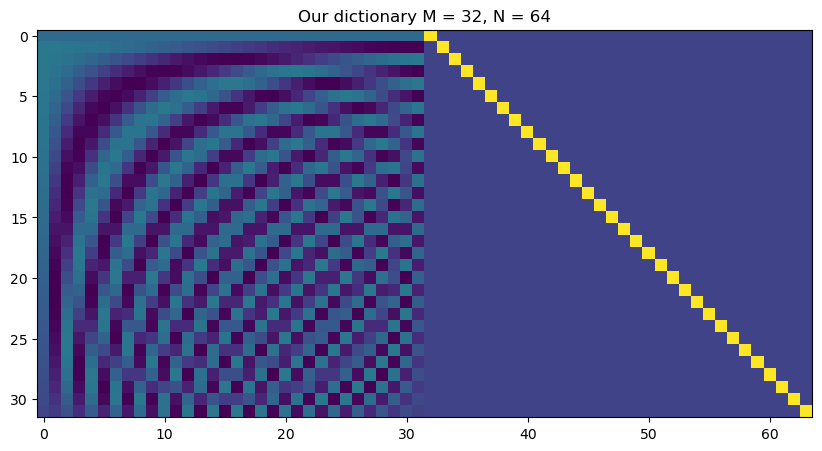

In [7]:
D = np.hstack((DCT, C))

plt.figure(figsize=(10,10))
plt.imshow(D)
plt.title(f'Our dictionary M = {M}, N = {N}')

Generate a signal that is sparse w.r.t. $D$
-----------------------------------------
To this purpose add a spike to the sum of few DCT atoms, i.e., add a spike to s that is sparse w.r.t. D. Bear in mind that the spike is to be considered a signal to be reconstructed, rather than noise

In [9]:
L = 4
sigma_noise = 1

Randomly define the coefficients of a sparse representation w.r.t. $D$ (make sure the nonzero coefficients are sufficiently large)

In [10]:
x0 = np.zeros((N, 1))
x0[:L] = np.random.randn(L, 1)
x0 = x0[np.random.permutation(N)]

Choose spike location

In [11]:
spikeLocation = 6
x0[spikeLocation] = 15

Synthetize the corresponding signal in the signal domain and add noise


In [12]:
s0 = D @ x0
s = s0 + sigma_noise * np.random.randn(M, 1)

Plot the sparse signal

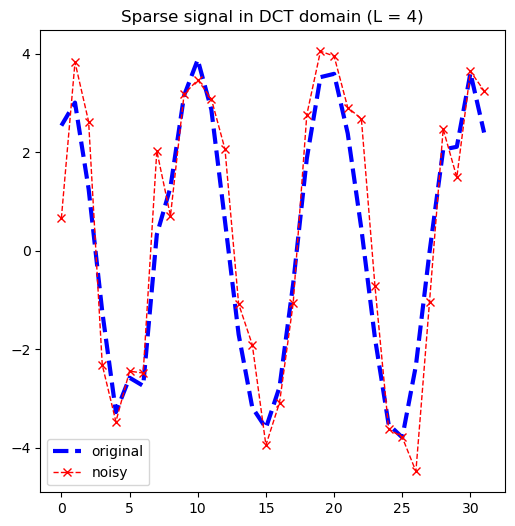

In [13]:
LN_WDT = 2
MRK_SZ = 10

plt.figure(figsize=(6, 6))
plt.plot(s0, 'b--', linewidth=LN_WDT+1)
plt.plot(s, 'r--x', linewidth=LN_WDT-1)
plt.title(f'Sparse signal in DCT domain (L = {L:.0f})')
plt.legend(['original', 'noisy'])


Orthogonal Matching Pursuit
---------------------------

Initialize all the variables, including the residual, namely the components of the signals that can not be represented (here the signal at the very beginning)

In [27]:
x_OMP = np.zeros((N, 1))

# residual
r = s.reshape(-1)

# support set
omega = list()

MINIMUM_NORM_RES = 0.1

OMP loop starts.

Stoppint criteria: continue until the sparsity of the representation reaches L

In [28]:
while len(omega) < L:

    # SWEEP STEP: look for the column of D that matches at best noisySignal
    # compute the residual w.r.t. each column of D
    e = np.zeros(N)
    for j in range(N):
        e[j] = np.linalg.norm(D[:, j] @ r)

    # find the column of D that matches at best r
    jStar = np.argmax(e)

    # UPDATE the support set with the jStar coefficient
    omega.append(jStar)

    _omega = list(omega)

    print(_omega)

    # update the coefficients by solving the least square problem min ||D_omega x - s ||
    x_OMP = np.linalg.inv(D[:, _omega].T @ D[:, _omega]) @ D[:, _omega].T @ s
    # update the residual
    r = s -  D[:, _omega] @ x_OMP

    x = np.zeros(N)
    x[list(omega)] = x_OMP.reshape(-1)


[6]
[6, 39]
[6, 39, 19]
[6, 39, 19, 7]


SYNTHESIS: reconstruct the signal, by inverting the transformation to reconstruct the signal

In [29]:
s_hat_OMP = D @ x

Show the result

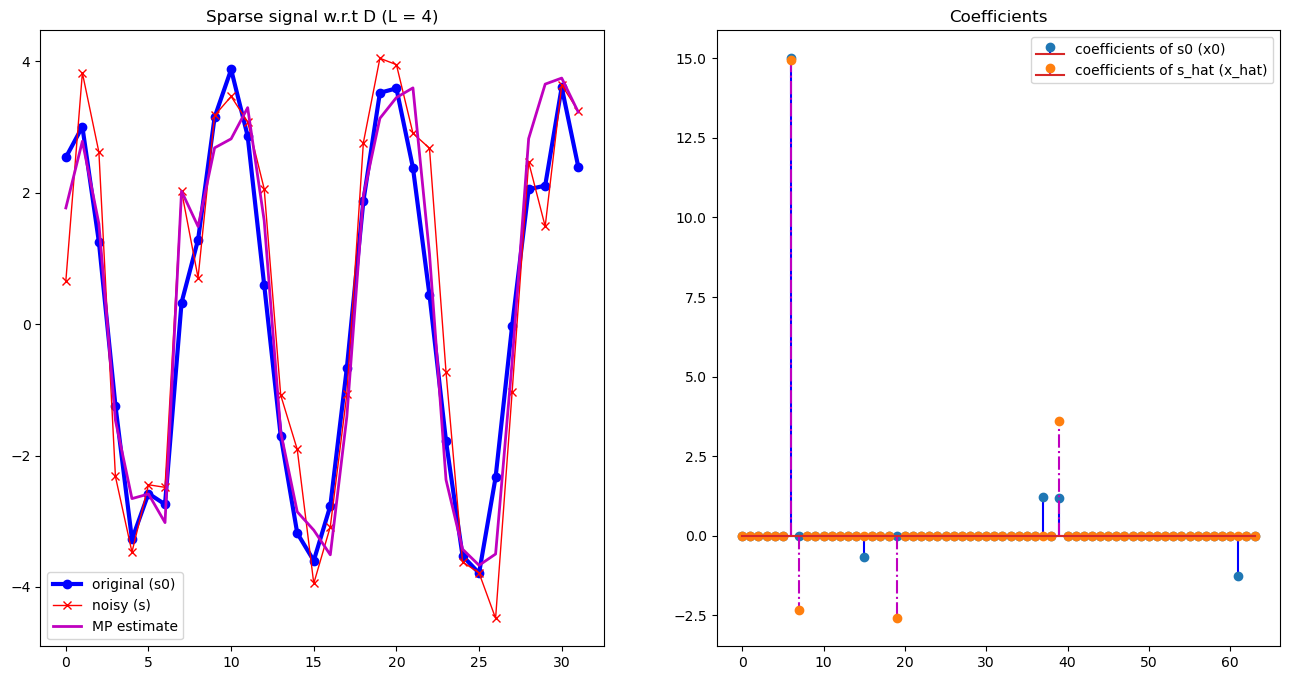

In [31]:
LN_WDT = 2
MRK_SZ = 10

fix, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(s0, 'b-o', linewidth=LN_WDT + 1)
ax[0].plot(s, 'r-x', linewidth=LN_WDT - 1)
ax[0].plot(s_hat_OMP, 'm-', linewidth=LN_WDT)
ax[0].set_title(f'Sparse signal w.r.t D (L = {L:.0f})')
ax[0].legend(['original (s0)', 'noisy (s)', 'MP estimate'])

ax[1].stem(x0, linefmt='b-', markerfmt='C0o')
ax[1].stem(x, linefmt='m-.', markerfmt='C1o')
ax[1].set_title('Coefficients')
ax[1].legend(['coefficients of s0 (x0)', 'coefficients of s_hat (x_hat)'])

Least Squares Orthogonal Matching Pursuit
-----------------------------------------

Initialize all the variables, including the residual, namely the components of the signals that can not be represented (here the signal at the very beginning)

In [ ]:
x_LSOMP = 

# residual
# r =

# support set
omega = []

MINIMUM_NORM_RES = 0.1

LSOMP loop starts.

Stoppint criteria: continue until the sparsity of the representation reaches L

In [ ]:
while # STOPPING CRITERIA:
    # SWEEP STEP: find the best column by solving the LS problem
    if len(omega) == 0:
        # at the first iteration perform the usual sweep step
        # x_LSOMP =
    else:
        # perform the sweep step by solving the LS problem
        # jStar =

        # UPDATE the support set with the jStar coefficient
        # omega
        # update the coefficients
        # x_LSOMP =

    # update the residual
    # r =



SYNTHESIS: reconstruct the signal, by inverting the transformation to reconstruct the signal

In [ ]:
# s_hat_LSOMP =

Show the result

In [ ]:
LN_WDT = 2
MRK_SZ = 10

fix, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(s0, 'b-o', linewidth=LN_WDT + 1)
ax[0].plot(s, 'r-x', linewidth=LN_WDT - 1)
ax[0].plot(s_hat_LSOMP, 'm-', linewidth=LN_WDT)
ax[0].set_title(f'Sparse signal w.r.t D (L = {L:.0f})')
ax[0].legend(['original (s0)', 'noisy (s)', 'MP estimate'])

ax[1].stem(x0, linefmt='b-', markerfmt='C0o')
ax[1].stem(x_LSOMP, linefmt='m-.', markerfmt='C1o')
ax[1].set_title('Coefficients')
ax[1].legend(['coefficients of s0 (x0)', 'coefficients of s_hat (x_hat)'])